<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Movie_Rating_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
#Mount Drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load our Dataset
path = "/content/drive/MyDrive/datasets/indian_movies.csv"

df = pd.read_csv(path, encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.shape

(15509, 10)

In [ ]:
df["Genre"].value_counts()

,count
Genre,
Drama,2780
Action,1289
Thriller,779
Romance,708
"Drama, Romance",524
...,...
"Documentary, Biography, History",1
"Documentary, Adventure, Drama",1
"Crime, Horror, Romance",1


In [ ]:
#Check null values
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df["Year"] = df["Year"].fillna(df["Year"].mode()[0])
df["Duration"] = df["Duration"].fillna(df["Duration"].mode()[0])
df["Genre"] = df["Genre"].fillna(df["Genre"].mode()[0])

In [ ]:
df["Votes"] = df["Votes"].fillna(df["Votes"].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  object 
 2   Duration  15509 non-null  object 
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),120 min,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)
print(df['Year'].head())

0    2019
1    2019
2    2021
3    2019
4    2010
Name: Year, dtype: int64


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,120 min,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:

timeList = []

for time in df["Duration"]:
    mins = time.split(" ")[0]
    timeList.append(int(mins))

df["Duration"] = timeList

In [ ]:
genreList = []

for genre in df["Genre"]:
    mins = genre.split(",")[0]
    genreList.append(mins)

df["Genre"] = genreList

In [ ]:
df["Genre"].value_counts()

,count
Genre,
Drama,6394
Action,3487
Comedy,1561
Thriller,786
Romance,762
Crime,459
Horror,403
Documentary,383
Adventure,252


In [ ]:
#Drop Unnecessary Columns
df = df.drop(["Actor 2", "Actor 3", "Actor 1", "Director", "Name"], axis=1)

In [ ]:
df.head()

,Year,Duration,Genre,Rating,Votes
0,2019,120,Drama,5.841621,8
1,2019,109,Drama,7.000000,8
2,2021,90,Drama,5.841621,8
3,2019,110,Comedy,4.400000,35
4,2010,105,Drama,5.841621,8


In [ ]:
#Do Preprocessing on the Genre Column
encoder = LabelEncoder()

df["Genre"] = encoder.fit_transform(df["Genre"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15509 non-null  int64  
 1   Duration  15509 non-null  int64  
 2   Genre     15509 non-null  int64  
 3   Rating    15509 non-null  float64
 4   Votes     15509 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 605.9+ KB


In [ ]:
#Turn our votes into Numerical values
def convert_votes_to_numeric(votes):
    if isinstance(votes, str):
        votes = votes.replace(",", "")
        if 'M' in votes:
            votes = float(votes.replace('$', '').replace('M', '')) * 1000000
        else:
            votes = float(votes.replace('$', ''))
    return int(votes)

df["Votes"] = df["Votes"].apply(convert_votes_to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15509 non-null  int64  
 1   Duration  15509 non-null  int64  
 2   Genre     15509 non-null  int64  
 3   Rating    15509 non-null  float64
 4   Votes     15509 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 605.9 KB


/tmp/ipython-input-878493020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Votes"])


<Axes: xlabel='Votes', ylabel='Density'>

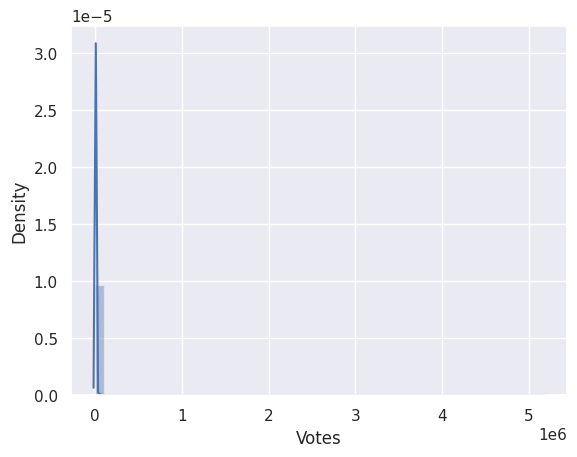

In [ ]:
sns.distplot(df["Votes"])

In [ ]:
X = df.drop("Rating", axis=1)
Y = df["Rating"]

In [ ]:
#StandardScaler on our votes
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
df.head()

,Year,Duration,Genre,Rating,Votes
0,2019,120,7,5.841621,8
1,2019,109,7,7.000000,8
2,2021,90,7,5.841621,8
3,2019,110,4,4.400000,35
4,2010,105,7,5.841621,8


<Axes: >

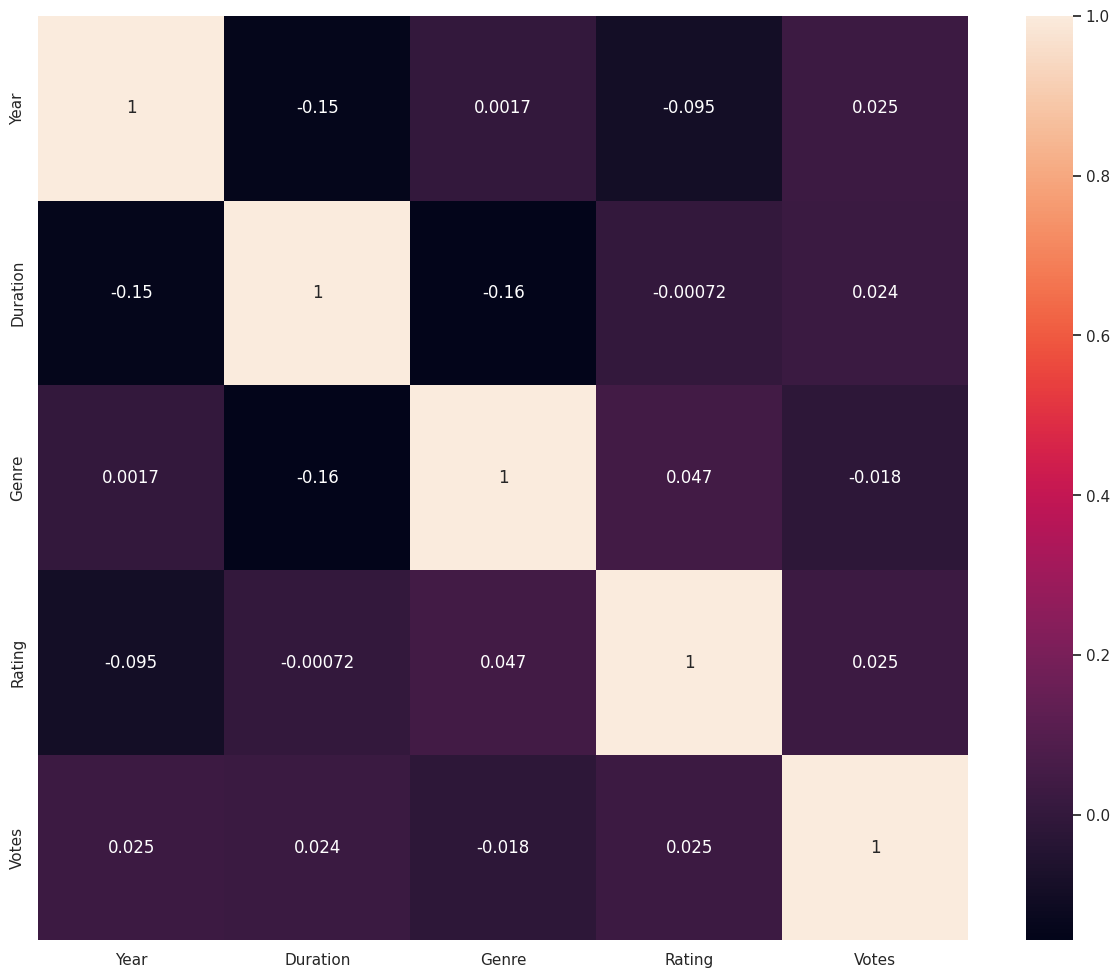

In [ ]:
#Correlation Matrix
corr = df.corr()

sns.set()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True)

In [ ]:
X

array([[ 1.2049051 , -0.18813198,  0.15602906, -0.03120052],
       [ 1.2049051 , -0.73363351,  0.15602906, -0.03120052],
       [ 1.2828956 , -1.67586342,  0.15602906, -0.03120052],
       ...,
       [ 0.65897165, -0.18813198, -1.23594914, -0.03120052],
       [-0.00394755, -0.18813198, -1.23594914, -0.03120052],
       [ 0.38600492,  0.3077785 , -1.23594914, -0.03091654]])

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.1, random_state=10
)

In [ ]:
#Model Function
def model_function(model):
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    score = r2_score(y_test, pred)
    error = mean_squared_error(y_test, pred)

    print("Score: ", score)
    print("Error: ", error)

In [ ]:
linear = LinearRegression()
model_function(linear)

Score:  0.012826622662040155
Error:  0.9650308426281596


In [ ]:
forest = RandomForestRegressor(n_estimators=150)
model_function(forest)

Score:  0.27228697568914073
Error:  0.7113902473098943


In [ ]:
lasso = Lasso()
model_function(lasso)

Score:  -0.00015434467364383586
Error:  0.9777206437650829
